# Check dataset images

In [10]:
import pandas as pd
import os
import plotly.express as px
import cv2
from tqdm.notebook import tqdm_notebook

In [11]:
DATASET_DIR = 'dataset2'

## check instances of all class training directory

In [12]:
cls_data_count_df = pd.DataFrame(columns=['class', 'image_count'])

In [13]:
for sub_dir in os.listdir(DATASET_DIR):
    sub_dir_path = f"{DATASET_DIR}/{sub_dir}"
    cls_data_count_df.loc[len(cls_data_count_df)] = [sub_dir, len(os.listdir(sub_dir_path))]

In [14]:
cls_data_count_df = cls_data_count_df.sort_values(by=['class']).reset_index(drop=True)

In [15]:
cls_data_count_df.head()

,class,image_count
0,A,3000
1,B,3000
2,C,3000
3,D,3000
4,E,3000


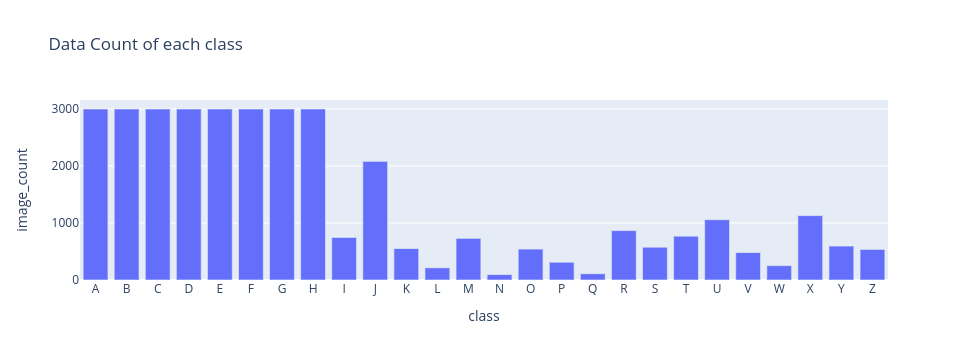

In [16]:
fig = px.bar(cls_data_count_df, 
             x='class', 
             y='image_count',
             title='Data Count of each class'
            )
fig.show()

## Image size distribute

In [17]:
image_size_record = dict()

for sub_dir in tqdm_notebook(os.listdir(DATASET_DIR)):
    sub_dir_path = f"{DATASET_DIR}/{sub_dir}"
    for image_name in os.listdir(sub_dir_path):
        image_path = f"{sub_dir_path}/{image_name}"
        image = cv2.imread(image_path)
        image_size = str(image.shape)
        
        if image_size in image_size_record.keys():
            image_size_record[image_size] += 1
        else:
            image_size_record[image_size] = 1

  0%|          | 0/26 [00:00<?, ?it/s]

In [18]:
image_size_df = pd.DataFrame(
    list(image_size_record.items()),
    columns=['size_type', 'image_count']
)

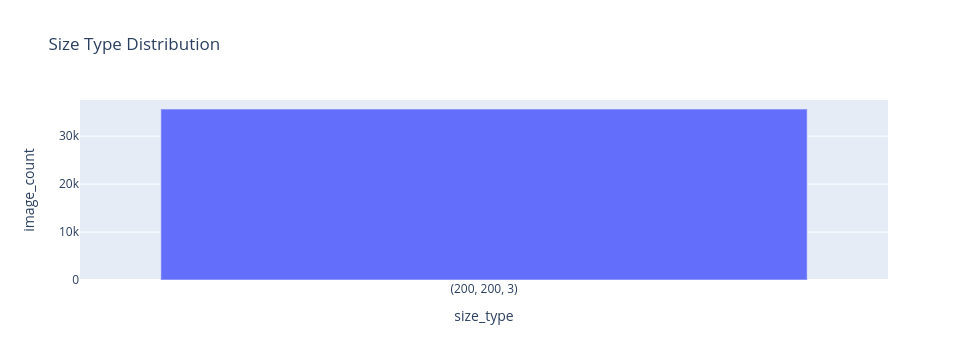

In [19]:
fig = px.bar(image_size_df, 
             x='size_type', 
             y='image_count',
             title='Size Type Distribution'
            )
fig.show()